## Estudo do algoritmo CORDIC

https://en.wikipedia.org/wiki/CORDIC

O algoritmo CORDIC (Coordinate Rotation Digital Computer), também conhecido como algoritmo de Volder (VOLDER, 1959), realiza o cálculo das funções trigonométricas seno e cosseno de um ângulo dado por meio de rotação vetorial. Basea-se em operações simples como soma, subtração, deslocamento de bits e tabelas, por essa razão é empregado em processadores digitais de baixa capacidade. A ideia básica por trás do algoritmo é calcular o valor de forma iterativa, gerando sucessivas aproximações. A cada interação um ângulo de correção é somado (a partir de valores tabelados), de modo a se obter uma sequência convergente, que se aproxima cada vez mais do resultado procurado.

Para a implementação do modo rotação do algoritmo, as coordenadas $x$ e $y$ dentro do cı́rculo trigonométrico unitário, correspondentes ao ângulo $z_0$ são aproximadas e o resiltado é refinado a cada iteração. Para começar, o algoritmo toma um vetor inicial $v_0 = (1,0)^T$.

A cada iteração do algoritmo, o vetor $v_0$ é rotacionado em sentido anti-horário ou horário em passos decrescentes a fim de obter aproximações cada vez melhores das coordenadas $x$ e $y$ do extremo do vetor. O algoritmo inicia em

$$
\left\{\begin{aligned}
x_0 & =1\\
y_0 & =0 \\
z_0 & =\theta
\end{aligned}\right.
$$

O ângulo $z_0=\theta$ é aquele para o qual deseja-se calcular o seno e o cosseno. A ideia é aplicar sucessivas rotações ao ângulo inicial ($\pi/4$), de forma conveniente e ue possamos obter uma sequência convergente de ângulos que se aproximam cada vez mais de $z_0$.

Podemos obter um vetor rotacionado $v_i$ ao aplicar uma rotação $R_i$ de um ângulo $\gamma_i$ ao vetor $v_{i-1}$ por meio de uma multiplicação pela matriz de rotação $R_i$ fazendo

$$
v_i=R_i v_{i-1}
$$

com $i=0,1,2,3,...$, sendo $R_i$ a matriz de rotação:

$$
R_i=\left[\begin{array}{cc}
\cos \left(\gamma_i\right) & -\sin \left(\gamma_i\right) \\
\sin \left(\gamma_i\right) & \cos \left(\gamma_i\right)
\end{array}\right]
$$



**Exemplo 1:** Vamos executar um pequeno programa para rotacionar desenhar os vetores:

In [ ]:
from numpy import cos, sin, pi, dot, arctan
import matplotlib.pyplot as plt

In [ ]:
v0 = [1,0]
s = 20        #em graus
s = s*pi/180  #converte em radianos

R = [[cos(s), -sin(s)],
     [sin(s),  cos(s)]]

v1 = dot(R,v0)
print(v1)

[0.93969262 0.34202014]


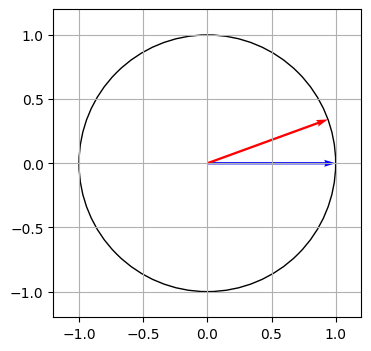

In [ ]:
fig, ax = plt.subplots(figsize=(4, 4))
plt.quiver(0, 0, v0[0], v0[1], color='b', angles='xy', scale_units='xy', scale=1)
plt.quiver(0, 0, v1[0], v1[1], color='r', angles='xy', scale_units='xy', scale=1)

plt.xlim(-1.2, 1.2)
plt.ylim(-1.2,1.2)
ax.add_patch(plt.Circle((0,0), 1, fill=False))
ax.set_aspect('equal')
plt.grid()
plt.show()

Os passos são definidos segundo a função trigonométrica $arctan(2^{−i})$ para $i=0,1,2,3,...$.
sin

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def plota_vetores(v_list):
    fig, ax = plt.subplots(figsize=(4,5))
    plt.quiver(0, 0, x, y, color='b',
                angles='xy', scale_units='xy',
                scale=1)

    plt.xlim(0, 1.2)
    plt.ylim(0,1)
    #ax.annotate(f'v({x},{y})', (x,y))
    ax.set_aspect('equal')
    plt.grid()
    plt.show()

Agora vamos observar que utilizando as identidades trigonométricas:

$$
\sin^2(\gamma_i)+cos^2(\gamma_i)=1
\quad \text{e} \quad
\tan \left(\gamma_i\right) \equiv \frac{\sin \left(\gamma_i\right)}{\cos \left(\gamma_i\right)}
$$

Podemos fazer:

$$\frac{\sin^2(\gamma_i)}{cos^2(\gamma_i)}+1=\frac{1}{cos^2(\gamma_i)}$$

$$\tan^2(\gamma_i) +1= \frac{1}{cos^2(\gamma_i)}$$



$$ \cos \left(\gamma_i\right)=\pm \frac{1}{\sqrt{1+\tan ^2\left(\gamma_i\right)}}$$

Então, para ângulos $\gamma_i<90^\circ$, podemos escrever a operação de rotação como

$$
v_i=\frac{1}{\sqrt{1+\tan ^2\left(\gamma_i\right)}}\left[\begin{array}{cc}
1 & -\tan \left(\gamma_i\right) \\
\tan \left(\gamma_i\right) & 1
\end{array}\right]\left[\begin{array}{l}
x_{i-1} \\
y_{i-1}
\end{array}\right]
$$

### O "pulo do gato"...

Limitando o ângulo $\gamma_i$ de tal forma que ele assuma valores $\tan(\gamma_i)=\pm 2^{-i}$ ($i\in \mathbb{N}$), a **multiplicação com a tangente pode ser realizada como uma divisão de potência de dois**, o que simplifica muito o cálculo em sistemas digitais, já que a divisão pode ser feita como soma de potências da base binária.Sistemas digitatais operam em base binária.

A imagem abaixo mostra o equivalente de alguns ângulos  $\gamma_i$ tais que $\tan(\gamma_i)= 2^{-i}$ em radianos e seu correspondente em base binária.

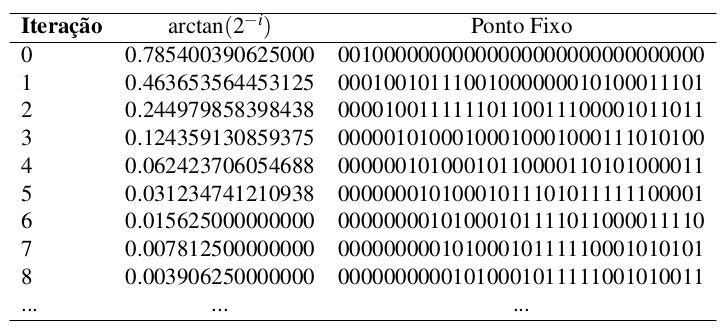

Então, fazendo

$$\tan(\gamma_i)=\pm 2^{-i} \quad \text{e} \quad K_i=\frac{1}{\sqrt{1+2^{-2 i}}}$$

podemos escrever:

$$
v_i=K_i\left[\begin{array}{cc}
1 & -\sigma_{i} 2^{-i} \\
\sigma_i 2^{-i} & 1
\end{array}\right]\left[\begin{array}{l}
x_{i-1} \\
y_{i-1}
\end{array}\right]
$$

Em que $\sigma$ alterna entre −1 e 1 indicando o sentido de rotaprocuradoção do vetor de forma a corrigir a aproximação caso a rotação resulte em um angulo maior ou menor que o ângulo desejado.

**Exemplo 2.** Neste exemplo vamos usar somas e subtrações de ângulos cuja tangente são potências negativas de 2 para tentar obter aproximações de um ângulo $z_0$ qualquer. Observe que aqui estamos desconsiderando o fator de escala $K$ e aplicando "pseudo rotações".


In [ ]:
# angulos em graus tais que a tangente é 2e-i
angles = []
for i in range(15):
    ang = arctan(2**(-i))*180/pi
    angles.append(ang)
    print (ang)

45.0
26.56505117707799
14.036243467926477
7.125016348901798
3.5763343749973515
1.7899106082460694
0.8951737102110744
0.44761417086055305
0.22381050036853808
0.1119056770662069
0.05595289189380367
0.027976452617003676
0.013988227142265016
0.006994113675352918
0.0034970568507040113


In [ ]:
z0 = 17
z = 0

for i in range(15):
    if z<z0:
        print('soma', angles[i])
        z = z + angles[i]
    else:
        print('subtrai', angles[i])
        z = z - angles[i]
    print (z)

soma 45.0
45.0
subtrai 26.56505117707799
18.43494882292201
subtrai 14.036243467926477
4.398705354995533
soma 7.125016348901798
11.52372170389733
soma 3.5763343749973515
15.100056078894681
soma 1.7899106082460694
16.88996668714075
soma 0.8951737102110744
17.785140397351825
subtrai 0.44761417086055305
17.33752622649127
subtrai 0.22381050036853808
17.11371572612273
subtrai 0.1119056770662069
17.001810049056523
subtrai 0.05595289189380367
16.94585715716272
soma 0.027976452617003676
16.973833609779724
soma 0.013988227142265016
16.987821836921988
soma 0.006994113675352918
16.994815950597342
soma 0.0034970568507040113
16.998313007448047


Observe que a constante $K$ não influencia na rotação do vetos $v_i$, sendo apenas um fator de escala, que altera o comprimento do vetor $v_i$ e não a sua direção. Assim, podemos omitir o fator de escala $K$ durante as iterações multiplicando apenas no final.

Na iteração de ordem $n$ o fator de escala a ser aplicado será

$$
K(n)=\prod_{i=0}^{n-1} K_i=\prod_{i=0}^{n-1} \frac{1}{\sqrt{1+2^{-2 i}}}
$$

em que

$$
K=\lim _{n \rightarrow \infty} K(n) \approx 0.6072529350088812561694
$$

Se necessário, para reduzir o esforço computacional, é possível manter o $K$ constante ($K=0.607252935$).

Omitindo a constante de escala, podemos escrever:

$$
\left\{\begin{array}{l}
x_i=x_{i-1}-\sigma_i 2^{-i} y_{i-1} \\
y_i=y_{i-1}+\sigma_i 2^{-i} x_{i-1}
\end{array}\right.
$$

que fornece o processo iterativo:  

$$
\left\{\begin{array}{lc}
x_{i+1}= & x_i-\sigma_i 2^{-i} y_i \\
y_{i+1}= & y_i+\sigma_i 2^{-i} x_i \\
z_{i+1}= & z_i+\sigma_i \arctan \left(2^{-i}\right)
\end{array}\right.
$$

O termo $z_{i+1}=  z_i-\sigma_i \arctan \left(2^{-i}\right)$ são as aproximações sucessivas de $z_0$ e durante as iterações é utilizado para comparar com o valor de $z_0$, de maneira que seja possı́vel identificar o sentido de rotação a ser realizado na próxima iteração (sentidos horário ou anti-horário).

Ao final do algoritmo os valores do seno e cosseno de $z_0$ serão, respectivamente, as coordenadas $y$ e $x$ multiplicadas pelo fator de escala $K$.

$$
\begin{cases}
    \cos(z_0) \approx  Kx_n \\
    \sin(z_0) \approx  Ky_n
\end{cases}
$$

**Exemplo 2:** Vamos calcular o valor aproximado do seno e do cosseno de $6^\circ$ usando o algoritmo CORDIC.

Para isso precisaremos de alguns valores de "pré-calculados" de ângulos cuja tangente são o inverso de potências de 2, ou seja, uma tabela de $\sigma_i$ tais que $\tan(\sigma_i)=2^{-i}$, com $i=1,2,3,...$.

In [ ]:
from math import atan, pi, sqrt

angles = [0]

for i in range(20):
    rad = atan(1/2**i)
    deg = rad*180/pi
    angles.append(rad)
    print(rad,'->', deg)

0.7853981633974483 -> 45.0
0.4636476090008061 -> 26.56505117707799
0.24497866312686414 -> 14.036243467926477
0.12435499454676144 -> 7.125016348901798
0.06241880999595735 -> 3.5763343749973515
0.031239833430268277 -> 1.7899106082460694
0.015623728620476831 -> 0.8951737102110744
0.007812341060101111 -> 0.44761417086055305
0.0039062301319669718 -> 0.22381050036853808
0.0019531225164788188 -> 0.1119056770662069
0.0009765621895593195 -> 0.05595289189380367
0.0004882812111948983 -> 0.027976452617003676
0.00024414062014936177 -> 0.013988227142265016
0.00012207031189367021 -> 0.006994113675352918
6.103515617420877e-05 -> 0.0034970568507040113
3.0517578115526096e-05 -> 0.0017485284269804495
1.5258789061315762e-05 -> 0.0008742642136937803
7.62939453110197e-06 -> 0.00043713210687233457
3.814697265606496e-06 -> 0.00021856605343934784
1.907348632810187e-06 -> 0.0001092830267200715


In [ ]:
print(angles)

[0, 0.7853981633974483, 0.4636476090008061, 0.24497866312686414, 0.12435499454676144, 0.06241880999595735, 0.031239833430268277, 0.015623728620476831, 0.007812341060101111, 0.0039062301319669718, 0.0019531225164788188, 0.0009765621895593195, 0.0004882812111948983, 0.00024414062014936177, 0.00012207031189367021, 6.103515617420877e-05, 3.0517578115526096e-05, 1.5258789061315762e-05, 7.62939453110197e-06, 3.814697265606496e-06, 1.907348632810187e-06]


Tambbém vamos precisar de valores de $K_i$ "pré-calculados", para isso vamos gerar a tabela

In [ ]:
kvalues = []
prods = 1
for i in range(20):
    K = 1/sqrt(1+2**(-2*i))
    prods = prods*K
    kvalues.append(prods)
    print (i, K, prods)

0 0.7071067811865475 0.7071067811865475
1 0.8944271909999159 0.6324555320336758
2 0.9701425001453319 0.6135719910778963
3 0.9922778767136677 0.6088339125177524
4 0.9980525784828885 0.6076482562561683
5 0.9995120760870788 0.607351770141296
6 0.9998779520346953 0.6072776440935261
7 0.9999694838187878 0.6072591122988928
8 0.9999923706927791 0.6072544793325625
9 0.9999980926568242 0.6072533210898753
10 0.9999995231631829 0.6072530315291345
11 0.9999998807907318 0.607252959138945
12 0.999999970197679 0.6072529410413973
13 0.9999999925494194 0.6072529365170103
14 0.9999999981373549 0.6072529353859135
15 0.9999999995343387 0.6072529351031394
16 0.9999999998835847 0.6072529350324458
17 0.9999999999708962 0.6072529350147724
18 0.999999999992724 0.607252935010354
19 0.999999999998181 0.6072529350092495


In [ ]:
print(kvalues)

[0.7071067811865475, 0.6324555320336758, 0.6135719910778963, 0.6088339125177524, 0.6076482562561683, 0.607351770141296, 0.6072776440935261, 0.6072591122988928, 0.6072544793325625, 0.6072533210898753, 0.6072530315291345, 0.607252959138945, 0.6072529410413973, 0.6072529365170103, 0.6072529353859135, 0.6072529351031394, 0.6072529350324458, 0.6072529350147724, 0.607252935010354, 0.6072529350092495]


In [ ]:
# inicializando
x_ant = 1
y_ant = 0

vs = [(x_ant,y_ant)]

z0 = 6
z_ant = 0
sigma=1

# 1ª iteração
i = 1
x = x_ant - sigma*2**(-i)*y_ant
y = y_ant + sigma*2**(-i)*x_ant
z = z_ant + sigma*angles[i]

x_ant = x
y_ant = y
z_ant = z

vs.append((x,y))

print(x, y, z, z*180/pi)

1.0 0.5 0.7853981633974483 45.0


In [ ]:
def plota_vetores(v_list):
    import numpy as np
    import matplotlib.pyplot as plt
    fig, ax = plt.subplots(figsize=(4,5))
    for v in vs:
        x = v[0]
        y = v[1]
        plt.quiver(0, 0, x, y, color='b',
                angles='xy', scale_units='xy', scale=1)

    plt.xlim(-0.2, 1.2)
    plt.ylim(-0.2,1.2)
    #ax.annotate(f'v({x},{y})', (x,y))
    ax.set_aspect('equal')
    plt.grid()
    plt.show()

In [ ]:
vs

[(1, 0), (1.0, 0.5)]

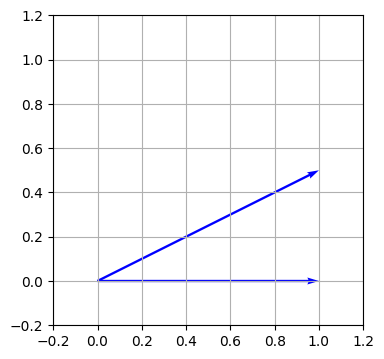

In [ ]:
plota_vetores(vs)

In [ ]:
if (z_ant*180/pi>z0):
    sigma = -1
else:
    sigma = 1

print (sigma)

-1


1.125 0.25 0.3217505543966422 18.43494882292201


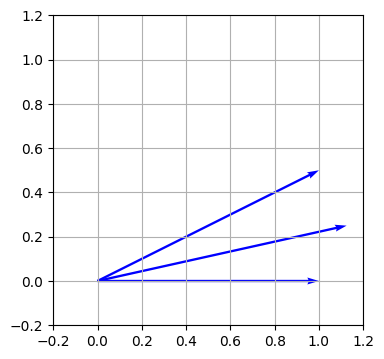

In [ ]:
# 2ª iteração
i = 2
x = x_ant - sigma*2**(-i)*y_ant
y = y_ant + sigma*2**(-i)*x_ant
z = z_ant + sigma*angles[i]

x_ant = x
y_ant = y
z_ant = z

print(x, y, z, z*180/pi)

vs.append((x,y))
plota_vetores(vs)

In [ ]:
if (z_ant*180/pi>z0):
    sigma = -1
else:
    sigma = 1

print (sigma)

-1


1.15625 0.109375 0.07677189126977804 4.398705354995532


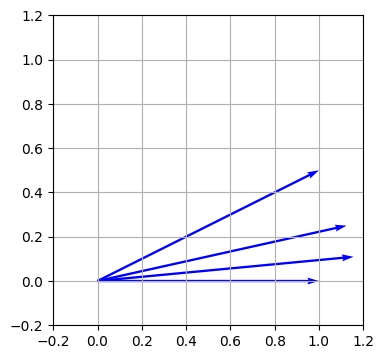

In [ ]:
# 3ª iteração
i = 3
x = x_ant - sigma*2**(-i)*y_ant
y = y_ant + sigma*2**(-i)*x_ant
z = z_ant + sigma*angles[i]

x_ant = x
y_ant = y
z_ant = z

print(x, y, z, z*180/pi)
vs.append((x,y))
plota_vetores(vs)

1
iteração: 4
1.1494140625 0.181640625 0.20112688581653948 11.523721703897332


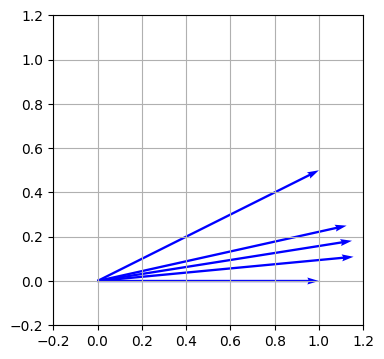

In [ ]:
if (z_ant*180/pi>z0):
    sigma = -1
else:
    sigma = 1
print (sigma)

i += 1

print("iteração:",i)
x = x_ant - sigma*2**(-i)*y_ant
y = y_ant + sigma*2**(-i)*x_ant
z = z_ant + sigma*angles[i]

x_ant = x
y_ant = y
z_ant = z

print(x, y, z, z*180/pi)
vs.append((x,y))
plota_vetores(vs)

In [ ]:
for i in range(5,20):
    if (z_ant*180/pi>z0):
        sigma = -1
    else:
        sigma = 1

    x = x_ant - sigma*2**(-i)*y_ant
    y = y_ant + sigma*2**(-i)*x_ant
    z = z_ant + sigma*angles[i]

    x_ant = x
    y_ant = y
    z_ant = z

    print(x, y, z, z*180/pi)


1.15509033203125 0.145721435546875 0.13870807582058214 7.94738732889998
1.15736722946167 0.12767314910888672 0.10746824239031387 6.15747672065391
1.158364675939083 0.11863121762871742 0.09184451376983704 5.262303010442836
1.157901272745221 0.12315607964410447 0.09965685482993815 5.709917181303389
1.157660733527166 0.12541760556743498 0.10356308496190512 5.933727681671928
1.157538255396729 0.1265481336275201 0.10551620747838394 6.045633358738135
1.157600046477602 0.12598292940125216 0.10453964528882463 5.989680466844331
1.1575692889264786 0.12626554660009923 0.10502792650001953 6.017656919461335
1.15758470220121 0.12612424175525958 0.10478378587987017 6.003668692319071
1.1575924002140126 0.1260535883920881 0.1046617155679765 5.9966745786437174
1.1575885533637809 0.12608891530859853 0.10472275072415071 6.0001716354944215
1.1575904773279426 0.1260712519090416 0.1046922331460352 5.998423107067441
1.1575895154806228 0.12608008362349873 0.10470749193509651 5.999297371281136
1.157589034523272

# Implementação CODIC

In [ ]:
angles = [
    0.78539816339745, 0.46364760900081, 0.24497866312686, 0.12435499454676,
    0.06241880999596, 0.03123983343027, 0.01562372862048, 0.00781234106010,
    0.00390623013197, 0.00195312251648, 0.00097656218956, 0.00048828121119,
    0.00024414062015, 0.00012207031189, 0.00006103515617, 0.00003051757812,
    0.00001525878906, 0.00000762939453, 0.00000381469727, 0.00000190734863,
    0.00000095367432, 0.00000047683716, 0.00000023841858, 0.00000011920929,
    0.00000005960464, 0.00000002980232, 0.00000001490116, 0.00000000745058
]
kvalues = [
    0.70710678118655, 0.63245553203368, 0.61357199107790, 0.60883391251775,
    0.60764825625617, 0.60735177014130, 0.60727764409353, 0.60725911229889,
    0.60725447933256, 0.60725332108988, 0.60725303152913, 0.60725295913894,
    0.60725294104140, 0.60725293651701, 0.60725293538591, 0.60725293510314,
    0.60725293503245, 0.60725293501477, 0.60725293501035, 0.60725293500925,
    0.60725293500897, 0.60725293500890, 0.60725293500889, 0.60725293500888
]
radians = lambda degrees: (degrees * pi) / 180

In [ ]:
def Cordic(alpha, n, c_cos, c_sin):
    from math import pi, sin, cos, floor
    fig, ax = plt.subplots(figsize=(4,5))
    i, ix, sigma = 0, 0, 0
    kn, x, y, atn, t, theta = 0.0, 0.0, 0.0, 0.0, 0.0, 0.0
    pow2 = 1.0
    newsgn = 1 if floor(alpha / (2.0 * pi)) % 2 == 1 else -1


    if alpha < -pi/2.0 or alpha > pi/2.0:
        if alpha < 0:
            Cordic(alpha + pi, n, x, y)
        else:
            Cordic(alpha - pi, n, x, y)
        c_cos = x * newsgn
        c_sin = y * newsgn
        return c_cos, c_sin
    ix = n - 1
    if ix > 23: ix = 23
    kn = kvalues[ix]
    x = 1
    y = 0
    for i in range(n):
        atn = angles[i]
        sigma = 1 if theta < alpha else -1
        t = x
        x -= sigma * y * pow2
        y += sigma * t * pow2
        theta += sigma * atn
        print(x,y,theta,theta*180/pi)
        pow2 /= 2.0

        ax.quiver(0, 0, x, y, color='k',
          angles='xy', scale_units='xy', scale=1, alpha=0.2+i*0.04)
        ax.annotate(f'i={i}', (x,y))

    plt.xlim(0, 2)
    plt.ylim(0, 2)
    #ax.annotate(f'v({x},{y})', (x,y))
    ax.set_aspect('equal')
    plt.grid()
    plt.show()

    c_cos = x * kn
    c_sin = y * kn
    return c_cos, c_sin, theta

In [ ]:
ang = radians(6)
print(ang)

0.10471975511965977


1.0 1.0 0.78539816339745 45.0000000000001
1.5 0.5 0.3217505543966401 18.43494882292189
1.625 0.125 0.07677189126978007 4.3987053549956485
1.609375 0.328125 0.20112688581654006 11.523721703897364
1.6298828125 0.2275390625 0.13870807582058006 7.94738732889986
1.636993408203125 0.176605224609375 0.10746824239031007 6.157476720653693
1.6397528648376465 0.15102720260620117 0.09184451376983006 5.262303010442436
1.6385729648172855 0.16383777186274529 0.09965685482993006 5.7099171813029255
1.6379329735209467 0.1702384475065628 0.10356308496190006 5.933727681671637
1.6376004765531604 0.1734375353454709 0.10551620747838006 6.045633358737912
1.6377698491462713 0.17183831613008696 0.10453964528882005 5.989680466844068
1.6376859437184734 0.1726380084392404 0.10502792650001005 6.0176569194607925
1.6377280916697525 0.17223818276938727 0.10478378587986005 6.00366869231849
1.6377491168385476 0.17203826478944712 0.10466171556797005 5.996674578643348
1.6377386164561751 0.17213822506269166 0.1047227507241

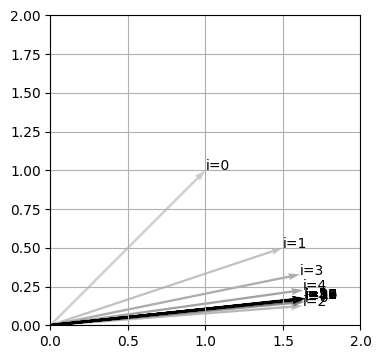

0.10452954556187839
0.994521781613972
6.00006235246725


In [ ]:
c_cos, c_sin, c_theta = Cordic(ang, 20, 0, 0)
print(c_sin)
print(c_cos)
print (c_theta*180/pi)